# Data Science

## Notebook 2 (APIs, web-scraping, classification, evaluation)

### Collecting data

* Dowloading data files directly
* Scraping data from a web page 
* Extract data from a web API

### API (Application Programming Interface)

* facilitates applications/websites to communicate with each other
* similar to a UI (User Interface) but designed for use by other applications rather than humans

How it works:
1. the client initiates an API call, or "request", to retreive information from the API
2. after recieving a valid request, the API makes a call to the webserver for that information
3. the server sends a response to the API with the requested information
4. the API transfers the data to the client application that requested the information


* we can extract data from a web API too (sometimes you need to get an API key for authentication)

#### Common Examples of APIs

* universal logins (e.g. "login with Google")

<span style="color:red">Other examples?</span>

In [1]:
import requests

api_key = 'J0CjIDeC0ArC2OdneTWp210aqwgHBhXc'
url = 'https://api.nytimes.com/svc/archive/v1/2019/1.json?api-key=' + api_key
nyt = requests.get(url)
print(nyt.status_code)

200


#### Most frequently used file formats
* CSV (comma sperated values)
* JSON (JavaScript Object Notation):
    * A text format that is independent of particular programming languages
    * Most of the web APIs return data in JSON data format
* HTML
    * hierarchical structure (tags)

##### Example - a possible JSON representation of a person

In [2]:
json_ex = {
  "firstName": "John",
  "lastName": "Smith",
  "isAlive": True,
  "age": 25,
  "address": {
    "streetAddress": "21 2nd Street",
    "city": "New York",
    "state": "NY",
    "postalCode": "10021-3100"
  },
  "phoneNumbers": [
    {
      "type": "home",
      "number": "212 555-1234"
    },
    {
      "type": "office",
      "number": "646 555-4567"
    },
    {
      "type": "mobile",
      "number": "123 456-7890"
    }
  ],
  "children": [],
  "spouse": None
}

In [3]:
type(json_ex)

dict

### Importing JSON files

In [4]:
import json

a = {'a': 1, 'b':2}
s = json.dumps(a)
a2 = json.loads(s)

In [5]:
a

{'a': 1, 'b': 2}

In [6]:
s

'{"a": 1, "b": 2}'

In [7]:
type(s)

str

In [8]:
a2

{'a': 1, 'b': 2}

In [9]:
type(a2)

dict

<span style="color:red">Where does this file get stored?</span>

In [14]:
with open('data.txt', 'w') as outfile:
    json.dump(a, outfile)

#### Importing data about the Hungarian National Football team at 2020 European Football (Soccer) Championship

In [15]:
with open('hungary-euro2020.json','r') as f:
    he2020=json.load(f)
he2020

{'Players': [{'id': '250065179',
   'pFName': 'Roland Sallai',
   'latinName': 'Roland Sallai',
   'tName': 'Hungary',
   'tId': '57',
   'cCode': 'HUN',
   'skill': 4,
   'value': 6.5,
   'BirthDate': '05.22.1997.',
   'Minutes Played': 242,
   'Club': 'Freiburg',
   'Goals': 0},
  {'id': '250118293',
   'pFName': 'Kevin Varga',
   'latinName': 'Kevin Varga',
   'tName': 'Hungary',
   'tId': '57',
   'cCode': 'HUN',
   'skill': 3,
   'value': 6.0,
   'BirthDate': '03.30.1996.',
   'Minutes Played': 10,
   'Club': 'Kasimpasa',
   'Goals': 0},
  {'id': '73865',
   'pFName': 'Ádám Szalai',
   'latinName': 'Adam Szalai',
   'tName': 'Hungary',
   'tId': '57',
   'cCode': 'HUN',
   'skill': 4,
   'value': 6.0,
   'BirthDate': '12.09.1987.',
   'Minutes Played': 198,
   'Club': 'Mainz',
   'Goals': 1},
  {'id': '250143313',
   'pFName': 'Tamás Cseri',
   'latinName': 'Tamas Cseri',
   'tName': 'Hungary',
   'tId': '57',
   'cCode': 'HUN',
   'skill': 3,
   'value': 5.5,
   'BirthDate': '01.

In [ ]:
import pandas as pd

pd.DataFrame(he2020).head()

In [16]:
players_list = he2020['Players']
players_list
print(type(players_list))
print(type(players_list[0]))
players_list[0]

<class 'list'>
<class 'dict'>


{'id': '250065179',
 'pFName': 'Roland Sallai',
 'latinName': 'Roland Sallai',
 'tName': 'Hungary',
 'tId': '57',
 'cCode': 'HUN',
 'skill': 4,
 'value': 6.5,
 'BirthDate': '05.22.1997.',
 'Minutes Played': 242,
 'Club': 'Freiburg',
 'Goals': 0}

##### Collecting the important information

Filtering important attributes

In [17]:
keys = ['pFName', 'Minutes Played', 'Goals', 'BirthDate', 'Club']

In [18]:
# extracting information about players
players_dat = []
for player in players_list:
    player_dat = []
    for key in keys:
        player_dat.append(player[key])
    players_dat.append(player_dat)

In [19]:
# same as above but with list comprehension 
players_dat = [[player[i] for i in keys] for player in players_list] 
players_dat[0:5]

[['Roland Sallai', 242, 0, '05.22.1997.', 'Freiburg'],
 ['Kevin Varga', 10, 0, '03.30.1996.', 'Kasimpasa'],
 ['Ádám Szalai', 198, 1, '12.09.1987.', 'Mainz'],
 ['Tamás Cseri', 15, 0, '01.15.1988.', 'Mezőkövesd'],
 ['Nemanja Nikolić', 66, 0, '12.31.1987.', 'Fehérvár']]

From list to Pandas data frame

In [21]:
import pandas as pd

players_df = pd.DataFrame(players_dat)
players_df.columns = ['Full name', 'Minutes played', 'Goals', 'Date of birth', 'Club']
players_df.head()

,Full name,Minutes played,Goals,Date of birth,Club
0,Roland Sallai,242,0,05.22.1997.,Freiburg
1,Kevin Varga,10,0,03.30.1996.,Kasimpasa
2,Ádám Szalai,198,1,12.09.1987.,Mainz
3,Tamás Cseri,15,0,01.15.1988.,Mezőkövesd
4,Nemanja Nikolić,66,0,12.31.1987.,Fehérvár


## Web Scraping

- Urllib: the most basic webscraping package 
- BeautifulSoup: Lightning fast static web page processing
- Selenium: To manipulate, test and scrape dynamic HTML web pages. It is able to use the elements of the user interface, for example fill in forms, check the checkboxes and so on...

**Strategy:** 
1. Extract the data with Selenium or Urllib
2. Turn the data into a beautiful soup object to search the html with BeautifulSoup functions.

**Be careful and fair (copyright, license, media law, server overloading, etc.)!**
- the robots.txt file, generally located at the root of a website, communicates to webcrawlers about what is off limits to scrape, protecting their intellectual property
- it is not a legal requirement but a widely used convention

For web scraping we should have a basic understanding of HTML tags!

## HTML, just the basics 

### Tags, Elements, Attributes

Tag: < something between angle brackets > <br>
Some important tags:
- <div>                   sections
- <h1> - <h6>             headings
- <p>, <pre>              paragraphs
- <ul>, <ol>, <li>        lists
- <a>                     links
- <img>                   images
- <table>                 tables
- <tr>                    rows within a table

Element: It begins with a tag, ends with a tag, and it contains the text between them aswell.
for example:

<html>

    <head>
    
        <h1> Fake header on a fake website </h1>
    
        <p style:'color:red'> This thing with it's tags is an element. </p>
        
    </head>
    
</html>


Attributes: Contains aditional information about the elements (in general they are in the opening of the tag). For example:


- <img src="picture.png">                  src is an attribute with the value "picture.png"
- <p style='color:red'> This is a red paragraph. </p>              color is a style attribute
- <a href="https://www.w3schools.com"> Visit W3Schools </a>  href is a link attribute

Learn more about HTML

https://www.w3schools.com/html/html_basic.asp

#### Most of the time when we scrape html pages we locate the information by it's tags and attributes. The most important attributes in this manner are id and class.

### DOM tree (Document Object Model)

#### The inner HTML of  the elements are of the same nature as the whole html page. We can use the same methods to locate an information for example in a div as we do in the html. 

### Scraping static webpages using Beautifulsoup and Urllib

**Reading an entire webpage as a string using Urllib**

In [22]:
from IPython.display import Image, display
from IPython.display import HTML

# the website we will scrape first
HTML('<iframe src=https://www.crummy.com/software/BeautifulSoup/ width=1000 height=400></iframe>')

C:\Users\ogiev\anaconda3\Lib\site-packages\IPython\core\display.py:431: UserWarning: Consider using IPython.display.IFrame instead
  warnings.warn("Consider using IPython.display.IFrame instead")


In [23]:
from urllib.request import urlopen

url = 'https://www.crummy.com/software/BeautifulSoup/'
source = urlopen(url).read().decode('utf-8') # read in html and decode bytes into string
print(source)

<!DOCTYPE HTML PUBLIC "-//W3C//DTD HTML 4.0 Transitional//EN"
"http://www.w3.org/TR/REC-html40/transitional.dtd">
<html>
<head>
<meta http-equiv="Content-Type" content="text/html; charset=utf-8">
<title>Beautiful Soup: We called him Tortoise because he taught us.</title>
<link rev="made" href="mailto:leonardr@segfault.org">
<link rel="stylesheet" type="text/css" href="/nb/themes/Default/nb.css">
<meta name="Description" content="Beautiful Soup: a library designed for screen-scraping HTML and XML.">
<meta name="generator" content="Markov Approximation 1.4 (module: leonardr)">
<meta name="author" content="Leonard Richardson">
</head>
<body bgcolor="white" text="black" link="blue" vlink="660066" alink="red">
<style>
#tidelift { }

#tidelift a {
 border: 1px solid #666666;
 margin-left: auto;
 padding: 10px;
 text-decoration: none;
}

#tidelift .cta {
 background: url("tidelift.svg") no-repeat;
 padding-left: 30px;
}
</style>		   

<img align="right" src="10.1.jpg" width="250"><br />

<p>[

The scraped contents of the url are just a string so you can use all of the python string manipulation methods you're familiar with like find(), count() and replace()

In [24]:
## count occurences of 'Soup'
print(type(source))
print(source.count('Soup'))

<class 'str'>
49


In [25]:
## find index of 'Reddit uses Beautiful Soup'
position =  source.find('Reddit uses Beautiful Soup')
print(position)

7427


In [26]:
# test to see the substring
print(source[position:position + len('Reddit uses Beautiful Soup')])

Reddit uses Beautiful Soup


In [27]:
import bs4 #this is beautiful soup

soup = bs4.BeautifulSoup(source)
print(soup)

<!DOCTYPE HTML PUBLIC "-//W3C//DTD HTML 4.0 Transitional//EN" "http://www.w3.org/TR/REC-html40/transitional.dtd">
<html>
<head>
<meta content="text/html; charset=utf-8" http-equiv="Content-Type"/>
<title>Beautiful Soup: We called him Tortoise because he taught us.</title>
<link href="mailto:leonardr@segfault.org" rev="made"/>
<link href="/nb/themes/Default/nb.css" rel="stylesheet" type="text/css"/>
<meta content="Beautiful Soup: a library designed for screen-scraping HTML and XML." name="Description"/>
<meta content="Markov Approximation 1.4 (module: leonardr)" name="generator"/>
<meta content="Leonard Richardson" name="author"/>
</head>
<body alink="red" bgcolor="white" link="blue" text="black" vlink="660066">
<style>
#tidelift { }

#tidelift a {
 border: 1px solid #666666;
 margin-left: auto;
 padding: 10px;
 text-decoration: none;
}

#tidelift .cta {
 background: url("tidelift.svg") no-repeat;
 padding-left: 30px;
}
</style>
<img align="right" src="10.1.jpg" width="250"/><br/>
<p>[ 

In [28]:
print(type(soup))

<class 'bs4.BeautifulSoup'>


In [29]:
print(soup.prettify()) # prettify() method to display the HTML in a readable format

<!DOCTYPE HTML PUBLIC "-//W3C//DTD HTML 4.0 Transitional//EN" "http://www.w3.org/TR/REC-html40/transitional.dtd">
<html>
 <head>
  <meta content="text/html; charset=utf-8" http-equiv="Content-Type"/>
  <title>
   Beautiful Soup: We called him Tortoise because he taught us.
  </title>
  <link href="mailto:leonardr@segfault.org" rev="made"/>
  <link href="/nb/themes/Default/nb.css" rel="stylesheet" type="text/css"/>
  <meta content="Beautiful Soup: a library designed for screen-scraping HTML and XML." name="Description"/>
  <meta content="Markov Approximation 1.4 (module: leonardr)" name="generator"/>
  <meta content="Leonard Richardson" name="author"/>
 </head>
 <body alink="red" bgcolor="white" link="blue" text="black" vlink="660066">
  <style>
   #tidelift { }

#tidelift a {
 border: 1px solid #666666;
 margin-left: auto;
 padding: 10px;
 text-decoration: none;
}

#tidelift .cta {
 background: url("tidelift.svg") no-repeat;
 padding-left: 30px;
}
  </style>
  <img align="right" src="1

In [32]:
header = soup.findAll('title') # or .find() to just get the first instance of the requested tag
header[0]

<title>Beautiful Soup: We called him Tortoise because he taught us.</title>

In [33]:
header[0].text

'Beautiful Soup: We called him Tortoise because he taught us.'

<span style="color:red">How would I extract just the website title?</span>

In [34]:
# find all links
soup.findAll('a')

[<a href="#Download">Download</a>,
 <a href="bs4/doc/">Documentation</a>,
 <a href="#HallOfFame">Hall of Fame</a>,
 <a href="enterprise.html">For enterprise</a>,
 <a href="https://code.launchpad.net/beautifulsoup">Source</a>,
 <a href="https://git.launchpad.net/beautifulsoup/tree/CHANGELOG">Changelog</a>,
 <a href="https://groups.google.com/forum/?fromgroups#!forum/beautifulsoup">Discussion group</a>,
 <a href="zine/">Zine</a>,
 <a href="bs4/download/"><h1>Beautiful Soup</h1></a>,
 <a href="http://lxml.de/">lxml</a>,
 <a href="http://code.google.com/p/html5lib/">html5lib</a>,
 <a href="bs4/doc/">Read more.</a>,
 <a href="https://tidelift.com/subscription/pkg/pypi-beautifulsoup4?utm_source=pypi-beautifulsoup4&amp;utm_medium=referral&amp;utm_campaign=enterprise" target="_blank">
 <span class="cta">
   Beautiful Soup for enterprise available via Tidelift
  </span>
 </a>,
 <a href="https://groups.google.com/forum/?fromgroups#!forum/beautifulsoup">the discussion
 group</a>,
 <a href="https:

In [35]:
links = soup.find_all('a')
a_link = links[10]
print(a_link)
a_link.get('href') # search within one tag for a specific attribute using .get()

<a href="http://code.google.com/p/html5lib/">html5lib</a>


'http://code.google.com/p/html5lib/'

In [36]:
# store all links on the page in a list
link_list = [l.get('href') for l in soup.findAll('a')]
link_list

['#Download',
 'bs4/doc/',
 '#HallOfFame',
 'enterprise.html',
 'https://code.launchpad.net/beautifulsoup',
 'https://git.launchpad.net/beautifulsoup/tree/CHANGELOG',
 'https://groups.google.com/forum/?fromgroups#!forum/beautifulsoup',
 'zine/',
 'bs4/download/',
 'http://lxml.de/',
 'http://code.google.com/p/html5lib/',
 'bs4/doc/',
 'https://tidelift.com/subscription/pkg/pypi-beautifulsoup4?utm_source=pypi-beautifulsoup4&utm_medium=referral&utm_campaign=enterprise',
 'https://groups.google.com/forum/?fromgroups#!forum/beautifulsoup',
 'https://bugs.launchpad.net/beautifulsoup/',
 'https://tidelift.com/security',
 'https://tidelift.com/subscription/pkg/pypi-beautifulsoup4?utm_source=pypi-beautifulsoup4&utm_medium=referral&utm_campaign=website',
 'zine/',
 None,
 'bs4/download/',
 'http://www.crummy.com/software/BeautifulSoup/bs3/documentation.html',
 'download/3.x/BeautifulSoup-3.2.2.tar.gz',
 'https://tidelift.com/subscription/pkg/pypi-beautifulsoup?utm_source=pypi-beautifulsoup&utm_

In [37]:
# extract all external links
external_links = []

# the loop filters out "None" and links that don't start with http
for l in link_list:
    if l is not None and l[:4] == 'http':
        external_links.append(l)
        
external_links

['https://code.launchpad.net/beautifulsoup',
 'https://git.launchpad.net/beautifulsoup/tree/CHANGELOG',
 'https://groups.google.com/forum/?fromgroups#!forum/beautifulsoup',
 'http://lxml.de/',
 'http://code.google.com/p/html5lib/',
 'https://tidelift.com/subscription/pkg/pypi-beautifulsoup4?utm_source=pypi-beautifulsoup4&utm_medium=referral&utm_campaign=enterprise',
 'https://groups.google.com/forum/?fromgroups#!forum/beautifulsoup',
 'https://bugs.launchpad.net/beautifulsoup/',
 'https://tidelift.com/security',
 'https://tidelift.com/subscription/pkg/pypi-beautifulsoup4?utm_source=pypi-beautifulsoup4&utm_medium=referral&utm_campaign=website',
 'http://www.crummy.com/software/BeautifulSoup/bs3/documentation.html',
 'https://tidelift.com/subscription/pkg/pypi-beautifulsoup?utm_source=pypi-beautifulsoup&utm_medium=referral&utm_campaign=website',
 'http://www.nytimes.com/2007/10/25/arts/design/25vide.html',
 'https://github.com/BlankerL/DXY-COVID-19-Crawler',
 'https://blog.tidelift.com/h

In [38]:
# the same this using list comprehension

[l for l in link_list if l is not None and l.startswith('http')]

['https://code.launchpad.net/beautifulsoup',
 'https://git.launchpad.net/beautifulsoup/tree/CHANGELOG',
 'https://groups.google.com/forum/?fromgroups#!forum/beautifulsoup',
 'http://lxml.de/',
 'http://code.google.com/p/html5lib/',
 'https://tidelift.com/subscription/pkg/pypi-beautifulsoup4?utm_source=pypi-beautifulsoup4&utm_medium=referral&utm_campaign=enterprise',
 'https://groups.google.com/forum/?fromgroups#!forum/beautifulsoup',
 'https://bugs.launchpad.net/beautifulsoup/',
 'https://tidelift.com/security',
 'https://tidelift.com/subscription/pkg/pypi-beautifulsoup4?utm_source=pypi-beautifulsoup4&utm_medium=referral&utm_campaign=website',
 'http://www.crummy.com/software/BeautifulSoup/bs3/documentation.html',
 'https://tidelift.com/subscription/pkg/pypi-beautifulsoup?utm_source=pypi-beautifulsoup&utm_medium=referral&utm_campaign=website',
 'http://www.nytimes.com/2007/10/25/arts/design/25vide.html',
 'https://github.com/BlankerL/DXY-COVID-19-Crawler',
 'https://blog.tidelift.com/h

### Scraping dynamic webpages using Selenium

In [39]:
!pip3 install selenium
!pip3 install webdriver-manager

In [40]:
%%capture --no-display
HTML('<iframe src=https://www.worldometers.info/coronavirus/weekly-trends/ width=1000 height=400></iframe>')

What if we need information on the weekly case/death change? - Our robot must click on the Columns dropdown menu and select the required columns. We need another package called Selenium to this end.

In [41]:
import selenium
from selenium import webdriver
from bs4 import BeautifulSoup
import time

1. Open the website

In [42]:
from selenium import webdriver
from selenium.webdriver.chrome.service import Service
from webdriver_manager.chrome import ChromeDriverManager

driver = webdriver.Chrome(service=Service(ChromeDriverManager().install()))
driver.get('https://www.worldometers.info/coronavirus/weekly-trends/')

If this doesn't work for you, heres another way to open the website. You'll first have to install a Web Driver, for example Google Chrome:

https://chromedriver.chromium.org/downloads 

Make sure to download the version that matches the current version of your chrome browser! Store the webdriver .exe file somewhere you can access it with a relative file path.

In [ ]:
options = webdriver.ChromeOptions()
s = Service('../Data/chromedriver/chromedriver.exe') # chromedriver is an .exe file, depending on your computer you may have to specify this file extension
driver = webdriver.Chrome(service=s, options=options)
driver.get('https://www.worldometers.info/coronavirus/weekly-trends/')

2. Select the dropdown menu

In [43]:
from selenium.webdriver.common.by import By

element = driver.find_element(By.CLASS_NAME,'dropdown-toggle')
print(element.text) # '.text' identifies whats on the website so check to make sure it's right

Columns


3. Click on the dropdown menu

In [44]:
element = driver.find_element(By.CLASS_NAME,'dropdown-toggle')

time.sleep(2) # pause to ensure that the website has fully opened, sometimes selenium is too fast
element.click() # element must be visible in the simulated web browser in order to click on it
time.sleep(2)

element = driver.find_element(By.ID,'colsDrop')
element.text

'Cases in the last 7 days\nCases in the preceding 7 days\nWeekly Case % Change\nCases in the last 7 days/1M pop\nDeaths in the last 7 days\nDeaths in the preceding 7 days\nWeekly Death % Change\nDeaths in the last 7 days/1M pop\nWeekly Case Change\nWeekly Case Change/1M pop\nWeekly Deaths Change\nWeekly Deaths Change/1M pop\nPopulation'

In [45]:
element.get_attribute('innerHTML')

'\n\n            <li><div class="checkbox"><label for="column_2"><input id="column_2" checked="" type="checkbox" class="toggle-vis" data-column="2">Cases in the last 7 days</label></div></li><li><div class="checkbox"><label for="column_3"><input id="column_3" checked="" type="checkbox" class="toggle-vis" data-column="3">Cases in the preceding  7 days</label></div></li><li><div class="checkbox"><label for="column_4"><input id="column_4" checked="" type="checkbox" class="toggle-vis" data-column="4"><nobr>Weekly Case</nobr> <nobr>% Change</nobr></label></div></li><li><div class="checkbox"><label for="column_5"><input id="column_5" checked="" type="checkbox" class="toggle-vis" data-column="5">Cases in the last <nobr>7 days</nobr>/1M pop</label></div></li><li><div class="checkbox"><label for="column_6"><input id="column_6" checked="" type="checkbox" class="toggle-vis" data-column="6">Deaths in the last <nobr>7 days</nobr></label></div></li><li><div class="checkbox"><label for="column_7"><in

4. Click the checkboxes

In [46]:
element1 = element.find_element(By.ID, 'column_10')
element2 = element.find_element(By.ID, 'column_12')

driver.execute_script("arguments[0].click();", element1)
driver.execute_script("arguments[0].click();", element2)

5. Download the source

In [47]:
source = driver.page_source

We need a pandas data frame with the countires and their weekly case change and death change. Let's process the html source / data with BeautifulSoup.

In [48]:
soup = BeautifulSoup(source)

In [49]:
# arguments: tag, {attribute: value}
table = soup.find('table', {'id':'main_table_countries_today'})
table

<table class="table table-bordered table-hover main_table_countries dataTable no-footer" id="main_table_countries_today" style="width: 100%; margin-top: 0px !important;">
<thead>
<tr role="row"><th aria-label="#" class="sorting_disabled" colspan="1" rowspan="1" style="width: 14.2px;" width="1%">#</th><th aria-controls="main_table_countries_today" aria-label="Country,Other: activate to sort column ascending" class="sorting" colspan="1" rowspan="1" style="width: 100.2px;" tabindex="0" width="100">Country,<br/>Other</th><th aria-controls="main_table_countries_today" aria-label="Cases in the last 7 days: activate to sort column ascending" aria-sort="descending" class="sorting_desc" colspan="1" rowspan="1" style="width: 40.2px;" tabindex="0" width="30">Cases in the last 7 days</th><th aria-controls="main_table_countries_today" aria-label="Cases in the preceding  7 days: activate to sort column descending" class="sorting" colspan="1" rowspan="1" style="width: 70.2px;" tabindex="0" width="30"

In [50]:
rows = table.find_all('tr')
rows[7] # use .text to understand what part of the site it is

<tr class="odd" role="row" style="">
<td style="font-size:12px;color: grey;text-align:center;vertical-align:middle;">3</td>
<td style="font-weight: bold; font-size:15px; text-align:left;"><a class="mt_a" href="/coronavirus/country/australia/">Australia</a></td>
<td class="sorting_1" style="font-weight: bold; text-align:right">4,483</td>
<td style="font-weight: bold; text-align:right">5,535</td>
<td style="font-weight: bold; text-align:right">-19%</td>
<td style="font-weight: bold; text-align:right">172</td>
<td style="font-weight: bold; text-align:right">16</td>
<td style="font-weight: bold; text-align:right">28</td>
<td style="font-weight: bold; text-align:right">-43%</td>
<td style="font-weight: bold; text-align:right">0.6</td>
<td style="font-weight: bold; text-align:right">-1,052</td><td style="font-weight: bold; text-align:right">-12</td><td style="font-weight: bold; text-align:right">26,068,792</td>
<td data-continent="Australia/Oceania" style="display:none">Australia/Oceania</td

In [51]:
countries=[]

for row in rows:
    countries.append(row.find('a', {'class':'mt_a'}))
    
countries

[None,
 None,
 None,
 <a class="mt_a" href="/coronavirus/country/russia/">Russia</a>,
 None,
 <a class="mt_a" href="/coronavirus/country/us/">USA</a>,
 None,
 <a class="mt_a" href="/coronavirus/country/australia/">Australia</a>,
 None,
 None,
 <a class="mt_a" href="/coronavirus/country/chile/">Chile</a>,
 <a class="mt_a" href="/coronavirus/country/china-hong-kong-sar/">Hong Kong</a>,
 <a class="mt_a" href="/coronavirus/country/india/">India</a>,
 <a class="mt_a" href="/coronavirus/country/germany/">Germany</a>,
 <a class="mt_a" href="/coronavirus/country/italy/">Italy</a>,
 <a class="mt_a" href="/coronavirus/country/canada/">Canada</a>,
 <a class="mt_a" href="/coronavirus/country/afghanistan/">Afghanistan</a>,
 <a class="mt_a" href="/coronavirus/country/china-macao-sar/">Macao</a>,
 <a class="mt_a" href="/coronavirus/country/romania/">Romania</a>,
 <a class="mt_a" href="/coronavirus/country/lithuania/">Lithuania</a>,
 <a class="mt_a" href="/coronavirus/country/malaysia/">Malaysia</a>,


In [52]:
countries=list(filter(lambda x: x != None, countries))
countries

[<a class="mt_a" href="/coronavirus/country/russia/">Russia</a>,
 <a class="mt_a" href="/coronavirus/country/us/">USA</a>,
 <a class="mt_a" href="/coronavirus/country/australia/">Australia</a>,
 <a class="mt_a" href="/coronavirus/country/chile/">Chile</a>,
 <a class="mt_a" href="/coronavirus/country/china-hong-kong-sar/">Hong Kong</a>,
 <a class="mt_a" href="/coronavirus/country/india/">India</a>,
 <a class="mt_a" href="/coronavirus/country/germany/">Germany</a>,
 <a class="mt_a" href="/coronavirus/country/italy/">Italy</a>,
 <a class="mt_a" href="/coronavirus/country/canada/">Canada</a>,
 <a class="mt_a" href="/coronavirus/country/afghanistan/">Afghanistan</a>,
 <a class="mt_a" href="/coronavirus/country/china-macao-sar/">Macao</a>,
 <a class="mt_a" href="/coronavirus/country/romania/">Romania</a>,
 <a class="mt_a" href="/coronavirus/country/lithuania/">Lithuania</a>,
 <a class="mt_a" href="/coronavirus/country/malaysia/">Malaysia</a>,
 <a class="mt_a" href="/coronavirus/country/serbi

In [53]:
for row in range(len(countries)):
    countries[row] = countries[row].text
    
countries

['Russia',
 'USA',
 'Australia',
 'Chile',
 'Hong Kong',
 'India',
 'Germany',
 'Italy',
 'Canada',
 'Afghanistan',
 'Macao',
 'Romania',
 'Lithuania',
 'Malaysia',
 'Serbia',
 'Indonesia',
 'Poland',
 'Bulgaria',
 'Estonia',
 'Slovenia',
 'Montenegro',
 'Finland',
 'Sao Tome and Principe',
 'Laos',
 'Cambodia',
 'Cuba',
 'Sri Lanka',
 'Sweden',
 'Belgium',
 'Brazil',
 'Czechia',
 'Guatemala',
 'Latvia',
 'Malta',
 'New Zealand',
 'Togo']

In [54]:
list(map(lambda x: x.text, rows[0].find_all('th'))) # map() applies a function to each element of an iterable

['#',
 'Country,Other',
 'Cases in the last 7 days',
 'Cases in the preceding  7 days',
 'Weekly Case % Change',
 'Cases in the last 7 days/1M pop',
 'Deaths in the last 7 days',
 'Deaths in the preceding 7 days',
 'Weekly Death % Change',
 'Deaths in the last 7 days/1M pop',
 'Weekly Case Change',
 'Weekly Deaths Change',
 'Population',
 'Continent']

Now we know every tag that we are looking for, so we can extract the information from the html source!

In [55]:
rows=table.find_all('tr', {'role':'row'})
countries=[]
weekly_case_change=[]

for row in rows:
    try:
        countries.append(row.find('a', {'class':'mt_a'}).text)
        weekly_case_change.append(row.find_all('td')[4].text)
    except:
        continue

In [56]:
import pandas as pd

df = pd.DataFrame({'Countries':countries, 'Weekly_Case_Change':weekly_case_change})
df

,Countries,Weekly_Case_Change
0,Russia,-13%
1,USA,-60%
2,Australia,-19%
3,Chile,-57%
4,Hong Kong,-29%
5,India,+0.6%
6,Germany,-28%
7,Italy,-16%
8,Canada,-73%
9,Afghanistan,"+43,800%"


IMPORTANT: Don't scrape the data from the website over and over (server overload), instead save a datafile to your personal computer

In [57]:
df.to_csv('covid_scrape.csv')

In [58]:
df = pd.read_csv('covid_scrape.csv')
df.drop(labels=['Unnamed: 0'],axis=1,inplace=True)
df.head()

,Countries,Weekly_Case_Change
0,Russia,-13%
1,USA,-60%
2,Australia,-19%
3,Chile,-57%
4,Hong Kong,-29%


### Classification

#### Importing data

In [59]:
bank_data = pd.read_csv("bank.csv", delimiter = " ", names = ['age', 'sex', 'region', 'income', 'married', 'children', 'car','save_acct', 'current_acct', 'mortgage', 'pep'])

We have already worked with this data, the attributes:

* age: age of customer in years (numeric)
* sex: MALE / FEMALE
* region: inner_city/rural/suburban/town
* income: income of customer (numeric)
* married: is the customer married (YES/NO)
* children: number of children (numeric)
* car: does the customer own a car (YES/NO)
* save_acct: does the customer have a saving account (YES/NO)
* current_acct: does the customer have a current account (YES/NO)
* mortgage: does the customer have a mortgage (YES/NO)
* **pep: did the customer buy a PEP (Personal Equity Plan) after the last mailing (YES/NO)**

In [60]:
bank_data.head()

,age,sex,region,income,married,children,car,save_acct,current_acct,mortgage,pep
0,48,FEMALE,INNER_CITY,17546.0,NO,1,NO,NO,NO,NO,YES
1,40,MALE,TOWN,30085.1,YES,3,YES,NO,YES,YES,NO
2,51,FEMALE,INNER_CITY,16575.4,YES,0,YES,YES,YES,NO,NO
3,23,FEMALE,TOWN,20375.4,YES,3,NO,NO,YES,NO,NO
4,57,FEMALE,RURAL,50576.3,YES,0,NO,YES,NO,NO,NO


In [61]:
numeric_data = bank_data.replace(['NO', 'YES', 'MALE', 'FEMALE'],[0,1,0,1])
numeric_data.head()

,age,sex,region,income,married,children,car,save_acct,current_acct,mortgage,pep
0,48,1,INNER_CITY,17546.0,0,1,0,0,0,0,1
1,40,0,TOWN,30085.1,1,3,1,0,1,1,0
2,51,1,INNER_CITY,16575.4,1,0,1,1,1,0,0
3,23,1,TOWN,20375.4,1,3,0,0,1,0,0
4,57,1,RURAL,50576.3,1,0,0,1,0,0,0


### Turn categorical data into numerical data:

With one-hot-encoding with pandas get_dummies():

In [62]:
one_hot = pd.get_dummies(numeric_data['region'])
one_hot = one_hot.replace([True,False],[1,0])
one_hot.head()

,INNER_CITY,RURAL,SUBURBAN,TOWN
0,1,0,0,0
1,0,0,0,1
2,1,0,0,0
3,0,0,0,1
4,0,1,0,0


### Unlike pandas merge(), join() combines dataframes by index, so be careful not to use it if you have changed the rows

In [63]:
numeric_data = numeric_data.drop('region', axis = 1)
numeric_data = numeric_data.join(one_hot)
numeric_data.head()

,age,sex,income,married,children,car,save_acct,current_acct,mortgage,pep,INNER_CITY,RURAL,SUBURBAN,TOWN
0,48,1,17546.0,0,1,0,0,0,0,1,1,0,0,0
1,40,0,30085.1,1,3,1,0,1,1,0,0,0,0,1
2,51,1,16575.4,1,0,1,1,1,0,0,1,0,0,0
3,23,1,20375.4,1,3,0,0,1,0,0,0,0,0,1
4,57,1,50576.3,1,0,0,1,0,0,0,0,1,0,0


#### Introducing scikit-learn

In [64]:
from IPython.core.display import Image, display
from IPython.core.display import HTML
HTML('<iframe src=http://scikit-learn.org/stable/ width=1000 height=400></iframe>')

C:\Users\ogiev\AppData\Local\Temp\ipykernel_17164\78367304.py:1: DeprecationWarning: Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython display
  from IPython.core.display import Image, display
C:\Users\ogiev\anaconda3\Lib\site-packages\IPython\core\display.py:431: UserWarning: Consider using IPython.display.IFrame instead
  warnings.warn("Consider using IPython.display.IFrame instead")


Scikit-learn cheat sheet

In [65]:
HTML('<iframe src=https://s3.amazonaws.com/assets.datacamp.com/blog_assets/Scikit_Learn_Cheat_Sheet_Python.pdf width=1000 height=400></iframe>')

Machine learning with sci-kit learn:

1. Define the model!
```python
clf = LogisticRegression()
```

2. Fit the model!
```python
clf.fit(X_train, y_train)
```

3. Use the model for prediction!
```python
clf.predict(X_test)
```

**Preparing the label ("y", "target variable") and the other attributes**

For the bank dataset, our aim is to predict the PEP value 

In [66]:
numeric_data

,age,sex,income,married,children,car,save_acct,current_acct,mortgage,pep,INNER_CITY,RURAL,SUBURBAN,TOWN
0,48,1,17546.00,0,1,0,0,0,0,1,1,0,0,0
1,40,0,30085.10,1,3,1,0,1,1,0,0,0,0,1
2,51,1,16575.40,1,0,1,1,1,0,0,1,0,0,0
3,23,1,20375.40,1,3,0,0,1,0,0,0,0,0,1
4,57,1,50576.30,1,0,0,1,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
595,61,1,47025.00,0,2,1,1,1,1,0,1,0,0,0
596,30,1,9672.25,1,0,1,1,1,0,0,1,0,0,0
597,31,1,15976.30,1,0,1,1,0,0,1,0,0,0,1
598,29,0,14711.80,1,0,0,1,0,1,0,1,0,0,0


In [67]:
bank_labels = numeric_data['pep']

In [68]:
bank_attrs = numeric_data.drop('pep', axis=1)

In [69]:
bank_attrs.head()

,age,sex,income,married,children,car,save_acct,current_acct,mortgage,INNER_CITY,RURAL,SUBURBAN,TOWN
0,48,1,17546.0,0,1,0,0,0,0,1,0,0,0
1,40,0,30085.1,1,3,1,0,1,1,0,0,0,1
2,51,1,16575.4,1,0,1,1,1,0,1,0,0,0
3,23,1,20375.4,1,3,0,0,1,0,0,0,0,1
4,57,1,50576.3,1,0,0,1,0,0,0,1,0,0


Import the classifier we will be using, the sklearn's metrics with helpful functions to evaluate the performance of our model and sklearn's train_test_split to randomly select what portion of our data will be in the train set and the test set

In [70]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
from sklearn.model_selection import train_test_split

**Splitting the data (features and lables) to train and test data**

In [71]:
bank_features_train, bank_features_test, bank_labels_train, bank_labels_test = train_test_split(bank_attrs, bank_labels, test_size=0.25, random_state=42)

**Initiate and fit the kNN model** 

Choosing parameters, such as # nearest neighbors

<img src="knn.jpg" width=400 height=400 />

In [72]:
neigh = KNeighborsClassifier(n_neighbors=11, metric="euclidean")
neigh.fit(bank_features_train,bank_labels_train)

KNeighborsClassifier(metric='euclidean', n_neighbors=11)

In HW02, you will train a decision tree model. <span style="color:red">What parameters might a decision tree model have?</span> Parameter optimization: choosing the best value for these parameters can be tricky.

**Prediction**

In [73]:
predictions_binary = neigh.predict(bank_features_test)
predictions_binary

array([1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1,
       0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1,
       1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0,
       1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0], dtype=int64)

In [74]:
bank_labels_test[0:5]

110    1
419    0
565    0
77     1
181    1
Name: pep, dtype: int64

In [75]:
predictions_proba = neigh.predict_proba(bank_features_test)
predictions_proba[0:5]

array([[0.18181818, 0.81818182],
       [0.81818182, 0.18181818],
       [0.81818182, 0.18181818],
       [0.36363636, 0.63636364],
       [0.18181818, 0.81818182]])

**Evaluation**

**Confusion Matrix**

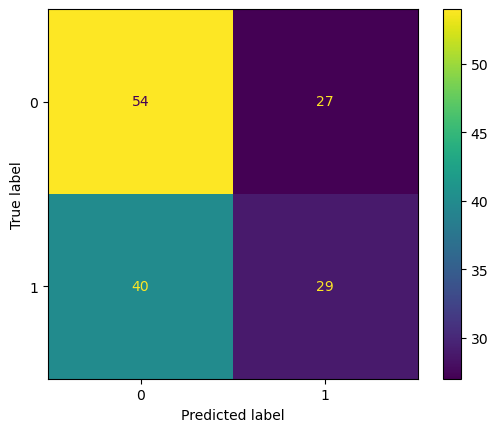

In [77]:
import matplotlib.pyplot as plt

cm = metrics.confusion_matrix(bank_labels_test,predictions_binary)
disp = metrics.ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=neigh.classes_)
disp.plot()
plt.show()

<p style="color:red">Which cell of the confusion matrix represents which term? </p>

**Precision, Recall, Accuracy**

In [78]:
print("Precision: ", metrics.precision_score(bank_labels_test,predictions_binary))
print("Recall: ", metrics.recall_score(bank_labels_test,predictions_binary))
print("Accuracy: ", metrics.accuracy_score(bank_labels_test,predictions_binary))

Precision:  0.5178571428571429
Recall:  0.42028985507246375
Accuracy:  0.5533333333333333


<p style="color:red">How would you calculate precision, recall and accuracy from the confusion matrix?</p>

**ROC, AUC on a small example**

In [79]:
y_true = [1,0,1,0,0,0,1,0,1,1]
y_score = [0.25,0.43,0.53,0.76,0.85,0.85,0.85,0.87,0.93,0.95]
# y_score = [1,0,1,1,0,0,1,0,1,0]
fpr, tpr, thresholds = metrics.roc_curve(y_true, y_score, pos_label=1, sample_weight=None)

In [80]:
tpr

array([0. , 0.2, 0.4, 0.4, 0.6, 0.6, 0.8, 0.8, 1. ])

(0.0, 1.0)

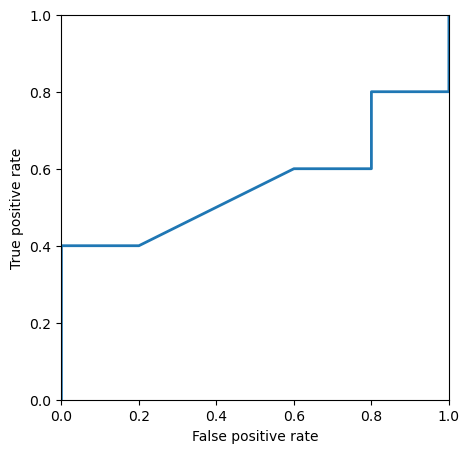

In [81]:
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline  

plt.figure(figsize=(5,5))
plt.plot(fpr,tpr,linewidth=2.0)
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.xlim([0,1])
plt.ylim([0,1])

We can also compute the area under the ROC curve

In [82]:
metrics.roc_auc_score(y_true, y_score)

0.56

**ROC and AUC on Bank dataset**

For the binary class predictions

In [83]:
fpr, tpr, thresholds = metrics.roc_curve(bank_labels_test, predictions_binary, pos_label=1, sample_weight=None)

(0.0, 1.0)

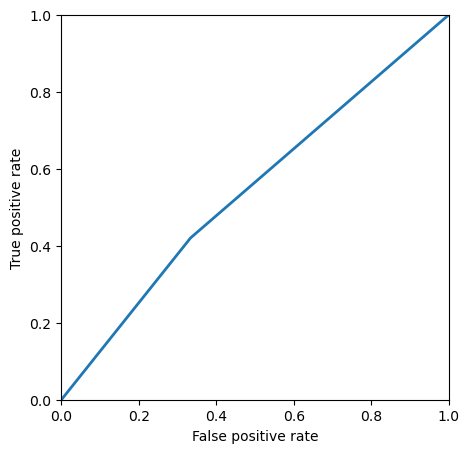

In [84]:
plt.figure(figsize=(5,5))
plt.plot(fpr,tpr,linewidth=2.0)
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.xlim([0,1])
plt.ylim([0,1])

In [85]:
metrics.roc_auc_score(bank_labels_test,predictions_binary, sample_weight=None)

0.5434782608695653

<p style="color:red;">What is the AUC score of a completely random classifier?</p>

For the probability class predictions

In [86]:
fpr, tpr, thresholds = metrics.roc_curve(bank_labels_test, predictions_proba[:,1], pos_label=1, sample_weight=None)

(0.0, 1.0)

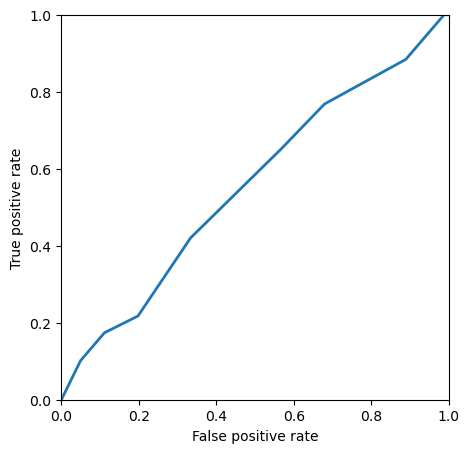

In [87]:
plt.figure(figsize=(5,5))
plt.plot(fpr,tpr,linewidth=2.0)
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.xlim([0,1])
plt.ylim([0,1])

In [88]:
metrics.roc_auc_score(bank_labels_test,predictions_proba[:,1], sample_weight=None)

0.554660941134371

Well, quite bad... :(

Maybe decision tree classifier will lead us to a better result, try it out! ==> **HW2/2**